# Assignment No-12-Naive Bayes
1) Prepare a classification model using Naive Bayes 
for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual

In [1]:
#Import Libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [3]:
#Import DataSet

In [4]:
salary_train = pd.read_csv("D:\ExcelR Solution\Data Science\Assignments\Assignment No 12 Naive Byes\SalaryData_Train.csv.crdownload")

In [5]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [6]:
salary_test = pd.read_csv("D:\ExcelR Solution\Data Science\Assignments\Assignment No 12 Naive Byes\SalaryData_Test.csv")

In [7]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# Exploratory Data Analysis

In [8]:
salary_train.shape


(2547, 14)

In [9]:
salary_test.shape

(15060, 14)

In [10]:
# preview the Training dataset

salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [11]:
# preview the Test dataset

salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [12]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2547 entries, 0 to 2546
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            2547 non-null   int64  
 1   workclass      2547 non-null   object 
 2   education      2547 non-null   object 
 3   educationno    2547 non-null   int64  
 4   maritalstatus  2547 non-null   object 
 5   occupation     2546 non-null   object 
 6   relationship   2546 non-null   object 
 7   race           2546 non-null   object 
 8   sex            2546 non-null   object 
 9   capitalgain    2546 non-null   float64
 10  capitalloss    2546 non-null   float64
 11  hoursperweek   2546 non-null   float64
 12  native         2546 non-null   object 
 13  Salary         2546 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 278.7+ KB


In [13]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,2547.000000,2547.000000,2546.000000,2546.000000,2546.000000
mean,38.718885,10.150373,1113.332286,93.420660,41.169285
std,13.025787,2.503525,7504.632964,411.055566,11.569726
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,2547.000000,99.000000


In [14]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [15]:
salary_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [16]:
salary_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       1
relationship     1
race             1
sex              1
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [17]:
salary_train1 = salary_train.dropna()
salary_train1.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [18]:
salary_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [19]:
#Finding the special characters in the data frame 
salary_train1.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [20]:
#Finding the special characters in the data frame 
salary_test.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [21]:
print(salary_train[0:5])

   age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male       2174.0   
1     Exec-managerial         Husband   White     Male          0.0   
2   Handlers-cleaners   Not-in-family   White     Male          0.0   
3   Handlers-cleaners         Husband   Black     Male          0.0   
4      Prof-specialty            Wife   Black   Female          0.0   

   capitalloss  hoursperweek          native  Salary  
0          0.0          40.0   United-States   <=50K  
1          0

# Explore categorical variables

In [22]:
# find categorical variables

categorical = [var for var in salary_train1.columns if salary_train1[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [23]:

# view the categorical variables

salary_train1[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


# Explore problems within categorical variables

In [24]:
# check missing values in categorical variables
salary_train1[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [25]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(salary_train1[var].value_counts())

 Private             1868
 Self-emp-not-inc     213
 Local-gov            182
 State-gov            109
 Self-emp-inc          96
 Federal-gov           77
 Without-pay            1
Name: workclass, dtype: int64
 HS-grad         845
 Some-college    546
 Bachelors       445
 Masters         144
 Assoc-voc       117
 11th             99
 Assoc-acdm       80
 10th             67
 7th-8th          45
 Prof-school      40
 9th              37
 Doctorate        26
 5th-6th          21
 12th             21
 1st-4th          11
 Preschool         2
Name: education, dtype: int64
 Married-civ-spouse       1186
 Never-married             816
 Divorced                  359
 Widowed                    77
 Separated                  73
 Married-spouse-absent      34
 Married-AF-spouse           1
Name: maritalstatus, dtype: int64
 Exec-managerial      337
 Craft-repair         330
 Sales                327
 Prof-specialty       319
 Adm-clerical         314
 Other-service        279
 Machine-op-ins

In [26]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(salary_train1[var].value_counts()/np.float(len(salary_train1)))

 Private             0.733700
 Self-emp-not-inc    0.083661
 Local-gov           0.071485
 State-gov           0.042812
 Self-emp-inc        0.037706
 Federal-gov         0.030244
 Without-pay         0.000393
Name: workclass, dtype: float64
 HS-grad         0.331893
 Some-college    0.214454
 Bachelors       0.174784
 Masters         0.056559
 Assoc-voc       0.045954
 11th            0.038885
 Assoc-acdm      0.031422
 10th            0.026316
 7th-8th         0.017675
 Prof-school     0.015711
 9th             0.014533
 Doctorate       0.010212
 5th-6th         0.008248
 12th            0.008248
 1st-4th         0.004321
 Preschool       0.000786
Name: education, dtype: float64
 Married-civ-spouse       0.465829
 Never-married            0.320503
 Divorced                 0.141005
 Widowed                  0.030244
 Separated                0.028672
 Married-spouse-absent    0.013354
 Married-AF-spouse        0.000393
Name: maritalstatus, dtype: float64
 Exec-managerial      0.13236

In [27]:
# check labels in workclass variable

salary_train1.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [28]:
# check frequency distribution of values in workclass variable

salary_train1.workclass.value_counts()

 Private             1868
 Self-emp-not-inc     213
 Local-gov            182
 State-gov            109
 Self-emp-inc          96
 Federal-gov           77
 Without-pay            1
Name: workclass, dtype: int64

# Explore occupation variable

In [29]:
# check labels in occupation variable

salary_train1.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [30]:
# check frequency distribution of values in occupation variable

salary_train1.occupation.value_counts()

 Exec-managerial      337
 Craft-repair         330
 Sales                327
 Prof-specialty       319
 Adm-clerical         314
 Other-service        279
 Machine-op-inspct    170
 Transport-moving     141
 Handlers-cleaners    101
 Tech-support          87
 Farming-fishing       75
 Protective-serv       54
 Priv-house-serv       10
 Armed-Forces           2
Name: occupation, dtype: int64

# Explore native_country variable

In [31]:
# check labels in native_country variable

salary_train1.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong'], dtype=object)

In [32]:
# check frequency distribution of values in native_country variable

salary_train1.native.value_counts()

 United-States                 2329
 Mexico                          50
 Philippines                     13
 Canada                          12
 England                         10
 Germany                          9
 Cuba                             9
 Puerto-Rico                      9
 India                            8
 Dominican-Republic               8
 China                            7
 Poland                           6
 Japan                            6
 Italy                            6
 El-Salvador                      6
 Iran                             6
 Portugal                         5
 Jamaica                          5
 Taiwan                           5
 Nicaragua                        4
 Haiti                            4
 Guatemala                        3
 South                            3
 Greece                           3
 Vietnam                          2
 Thailand                         2
 Cambodia                         2
 Columbia                   

# Number of labels: cardinality

In [33]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(salary_train1[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  38  labels
Salary  contains  2  labels


# Explore Numerical Variables


In [34]:
# find numerical variables

numerical = [var for var in salary_train1.columns if salary_train1[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [35]:
# view the numerical variables

salary_train1[numerical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174.0,0.0,40.0
1,50,13,0.0,0.0,13.0
2,38,9,0.0,0.0,40.0
3,53,7,0.0,0.0,40.0
4,28,13,0.0,0.0,40.0


# Explore problems within numerical variables

In [36]:
# check missing values in numerical variables

salary_train1[numerical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

In [37]:
X = salary_train1.drop(['Salary'], axis=1)

y = salary_train1['Salary']

In [38]:
#Split data into separate training and test set

In [39]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [40]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1782, 13), (764, 13))

# Feature Engineering

In [41]:

X_train.dtypes

age                int64
workclass         object
education         object
educationno        int64
maritalstatus     object
occupation        object
relationship      object
race              object
sex               object
capitalgain      float64
capitalloss      float64
hoursperweek     float64
native            object
dtype: object

In [42]:
X_test.dtypes

age                int64
workclass         object
education         object
educationno        int64
maritalstatus     object
occupation        object
relationship      object
race              object
sex               object
capitalgain      float64
capitalloss      float64
hoursperweek     float64
native            object
dtype: object

In [43]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [44]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [45]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

workclass        0.0
education        0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
sex              0.0
native           0.0
dtype: float64

In [46]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [47]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native'].fillna(X_train['native'].mode()[0], inplace=True)

In [48]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [49]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [50]:
# check missing values in X_train

X_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [51]:
# check missing values in X_test

X_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

# Encode categorical variables

In [52]:
# print categorical variables

categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [53]:
X_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native
2155,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,Taiwan
972,Private,Assoc-voc,Divorced,Craft-repair,Not-in-family,White,Female,United-States
1737,Private,Some-college,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
2068,Private,Some-college,Never-married,Handlers-cleaners,Own-child,White,Male,United-States
2545,Private,Bachelors,Never-married,Sales,Own-child,White,Male,United-States


In [54]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable


In [55]:
# import category encoders

import category_encoders as ce

In [56]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
                                 'race', 'sex', 'native'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [57]:

X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_26,native_27,native_28,native_29,native_30,native_31,native_32,native_33,native_34,native_35
2155,36,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
972,41,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1737,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2068,20,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2545,26,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
X_train.shape

(1782, 96)

In [59]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_26,native_27,native_28,native_29,native_30,native_31,native_32,native_33,native_34,native_35
81,30,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,56,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2159,44,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1857,34,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
644,36,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X_test.shape

(764, 96)

# Feature Scaling

In [61]:
cols = X_train.columns

In [62]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [63]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [64]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [65]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_26,native_27,native_28,native_29,native_30,native_31,native_32,native_33,native_34,native_35
0,-0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.210526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.631579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.894737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.578947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model training

In [66]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

# Predict the results

In [67]:
y_pred = gnb.predict(X_test)

y_pred

array([' <=50K', ' >50K', ' >50K', ' >50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K',
       ' >50K', ' >50K', ' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K',
       ' <=50K', ' >50K', ' <=50K', ' >50K', ' >50K', ' <=50K', ' <=50K',
       ' <=50K', ' >50K', ' >50K', ' >50K', ' <=50K', ' <=50K', ' >50K',
       ' <=50K', ' <=50K', ' >50K', ' >50K', ' <=50K', ' >50K', ' <=50K',
       ' >50K', ' >50K', ' <=50K', ' >50K', ' >50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' >50K', ' >50K', ' <=50K', ' >50K', ' <=50K',
       ' <=50K', ' >50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' >50K', ' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' >50K',
       ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=

# Check accuracy score

In [68]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7631


# Compare the train-set and test-set accuracy

In [69]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([' >50K', ' <=50K', ' <=50K', ..., ' >50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [70]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8182


# Check for overfitting and underfitting

In [71]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8182
Test set score: 0.7631


# Compare model accuracy with null accuracy

In [72]:
# check class distribution in test set

y_test.value_counts()

 <=50K    576
 >50K     188
Name: Salary, dtype: int64

In [73]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


# Confusion matrix

In [74]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[438 138]
 [ 43 145]]

True Positives(TP) =  438

True Negatives(TN) =  145

False Positives(FP) =  138

False Negatives(FN) =  43


<AxesSubplot:>

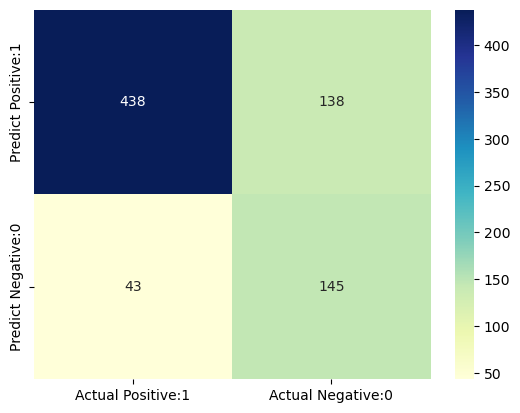

In [75]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification metrices

In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.91      0.76      0.83       576
        >50K       0.51      0.77      0.62       188

    accuracy                           0.76       764
   macro avg       0.71      0.77      0.72       764
weighted avg       0.81      0.76      0.78       764



# Classification accuracy

In [77]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [78]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7631


# Classification error

In [79]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2369


# Precision

In [80]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7604


In [81]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9106


In [82]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9106


# False Positive Rate

In [83]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4876


# Specificity

In [84]:

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5124


# Calculate class probabilities

In [85]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[9.99999092e-001, 9.07679433e-007],
       [5.27716043e-004, 9.99472284e-001],
       [9.47451195e-119, 1.00000000e+000],
       [4.51374983e-011, 1.00000000e+000],
       [9.90448714e-001, 9.55128571e-003],
       [9.99999953e-001, 4.69966531e-008],
       [7.95838517e-001, 2.04161483e-001],
       [8.66296163e-001, 1.33703837e-001],
       [2.19398196e-002, 9.78060180e-001],
       [9.99995352e-001, 4.64790002e-006]])

In [86]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,9.999991e-01,9.076794e-07
1,5.277160e-04,9.994723e-01
2,9.474512e-119,1.000000e+00
3,4.513750e-11,1.000000e+00
4,9.904487e-01,9.551286e-03
5,1.000000e+00,4.699665e-08
6,7.958385e-01,2.041615e-01
7,8.662962e-01,1.337038e-01
8,2.193982e-02,9.780602e-01
9,9.999954e-01,4.647900e-06


In [87]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([9.07679433e-07, 9.99472284e-01, 1.00000000e+00, 1.00000000e+00,
       9.55128571e-03, 4.69966531e-08, 2.04161483e-01, 1.33703837e-01,
       9.78060180e-01, 4.64790002e-06])

In [88]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

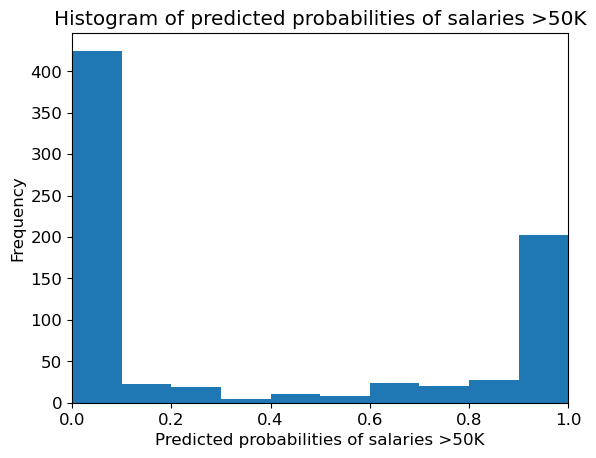

In [89]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

# ROC - AUC

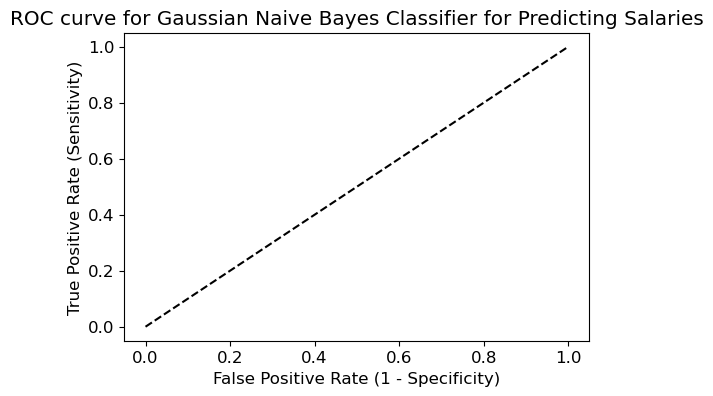

In [90]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [91]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8582


In [92]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8933


# k-Fold Cross Validation

In [93]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.8547486  0.76536313 0.80337079 0.75842697 0.78651685 0.85393258
 0.83146067 0.80898876 0.80337079 0.80898876]


In [94]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8075
